In [1]:
%load_ext autoreload
%autoreload 1

In [2]:
import datetime
from pymongo import MongoClient
import requests
from dotenv import load_dotenv
load_dotenv()
import os
import matplotlib.pyplot as plt

In [3]:
import sys
sys.path.append('../src')

from data.scrapeReddit import get_all
%aimport data.scrapeReddit

# Validate Scraped Reddit Data

In [4]:
MONGO_PASSWORD = os.environ['MONGO_USER_PASSWORD']
config = {
  'host': '3.20.206.120:27017',
  'username': 'dem_electorate_user',
  'password': MONGO_PASSWORD,
  'authSource': 'dem_electorate'
}
client = MongoClient(**config)
db = client.dem_electorate

## r/Democrats

### Comments

In [154]:
dem_comments = list(db.comments.find({'subreddit': 'democrats'}, {'_id': 0, 'created_utc': 1}))

Text(0.5, 1.0, 'r/Democrats comments by month')

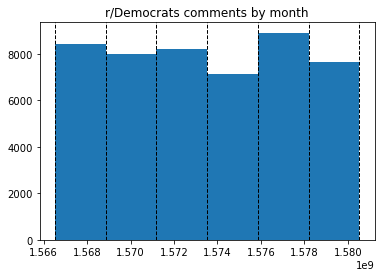

In [155]:
result = plt.hist([x['created_utc'] for x in dem_comments], bins=6)
for c in cutoffs:
    plt.axvline(c, color='k', linestyle='dashed', linewidth=1)
plt.title('r/Democrats comments by month')

Text(0.5, 1.0, 'r/Democrats comments by day')

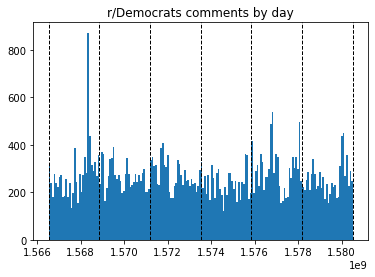

In [156]:
result = plt.hist([x['created_utc'] for x in dem_comments], bins=180)
for c in cutoffs:
    plt.axvline(c, color='k', linestyle='dashed', linewidth=1)
plt.title('r/Democrats comments by day')

**No major gaps in data**

In [157]:
dem_comment_ids = list(db.comments.find({'subreddit': 'democrats'}, {'_id': 0, 'id': 1}))
len(dem_comment_ids) == len(set([x['id'] for x in dem_comment_ids]))

True

**No Duplicates**

### Submissions

In [158]:
dem_submissions = list(db.submissions.find({'subreddit': 'democrats'}, {'_id': 0, 'created_utc': 1}))

Text(0.5, 1.0, 'r/Democrats comments by month')

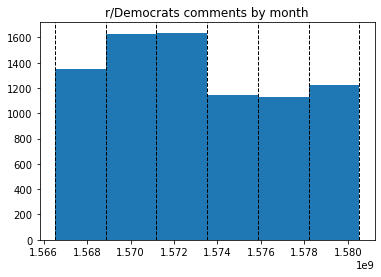

In [159]:
result = plt.hist([x['created_utc'] for x in dem_submissions], bins=6)
for c in cutoffs:
    plt.axvline(c, color='k', linestyle='dashed', linewidth=1)
plt.title('r/Democrats comments by month')

Text(0.5, 1.0, 'r/Democrats comments by day')

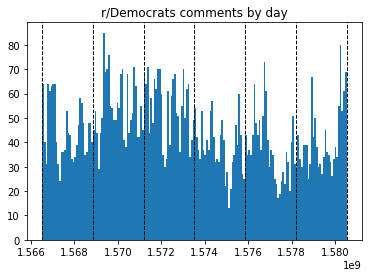

In [160]:
result = plt.hist([x['created_utc'] for x in dem_submissions], bins=180)
for c in cutoffs:
    plt.axvline(c, color='k', linestyle='dashed', linewidth=1)
plt.title('r/Democrats comments by day')

In [161]:
dem_sub_ids = list(db.submissions.find({'subreddit': 'democrats'}, {'_id': 0, 'id': 1}))
len(dem_sub_ids) == len(set([x['id'] for x in dem_sub_ids]))

True

**Submissions also has no duplicates and no gaps**

In [163]:
db.comments.find({'subreddit': 'democrats'}).count()

/Users/willyraedy/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """Entry point for launching an IPython kernel.


48270

In [164]:
db.submissions.find({'subreddit': 'democrats'}).count()

/Users/willyraedy/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """Entry point for launching an IPython kernel.


8115

## Non-r/politics

In [5]:
db.comments.find({'subreddit': {'$ne': 'politics'}}).count()

/Users/willyraedy/opt/anaconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """Entry point for launching an IPython kernel.


1351613

In [6]:
db.comments.create_index('id')

KeyboardInterrupt: 

In [ ]:
db.submissions.create_index('id')